# Analysis of recent data
We graph the latest data, and compare to previous waves

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import utilities as u

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
# plt.rcParams['figure.autolayout'] = True

def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
dat = pd.read_csv("../trends/data-by-day.csv")
dat.rename(columns={"CASE_COUNT": "NEW_COVID_CASE_COUNT",
                   "date_of_interest" :"DATE_OF_INTEREST"},
           inplace=True)
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [4]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()
dat["Hospitalized/day, 7 day avg"] = dat["HOSPITALIZED_COUNT"].rolling(window="7D").mean()
dat["Deaths/day, 7 day avg"] = dat["DEATH_COUNT"].rolling(window="7D").mean()

# Fifth wave and beyond

The 5th wave, Omicron variant BA.2, started in NYC before the first Omicron wave died off (towards the end of January).  We start plotting it at the beginning of March, around the low-point of the infection rate (which was 3/7).

As of 4/28, while infections and hospitalizations have been rising, deaths have continued to drop.  Also, it appears that infections started dropping off around the 16th, but might be back on the rise.  It was clear by the beginning of May that this drop was a blip, and infection rates continued to rise.

Since then, other variants have been noted.

As of 7/4, the infection rate peaked in the 3rd week of May, started dropping off again, only to rise towards the end of June.  I would expect a continued rise as people congregate more for the 4th of July, and in general for the summer.

Since then, I've lost track of the waves.  There was another peak at the end of 2022, with hospitalizations and mortality rates surpassing what was seen in May through September.

So, I'll display from the start of Omicron to the present, as well as rates for the last three and six months.

Text(0.5, 1.0, 'Covid rates, last 3 months')

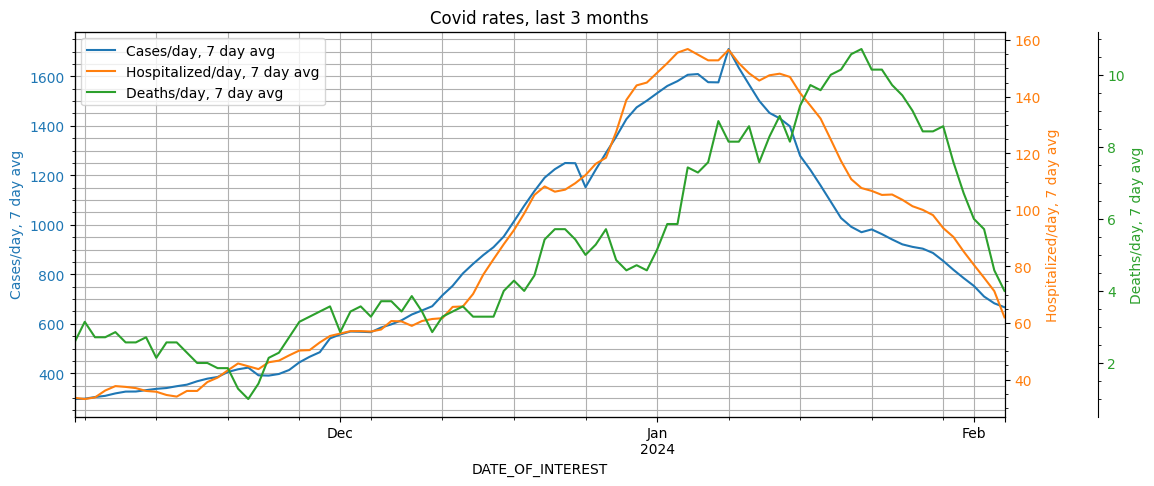

In [5]:
end = dat.index.max()
start = end-pd.tseries.offsets.DateOffset(months=3)
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.title("Covid rates, last 3 months")

Text(0.5, 1.0, 'Covid rates, last 6 months')

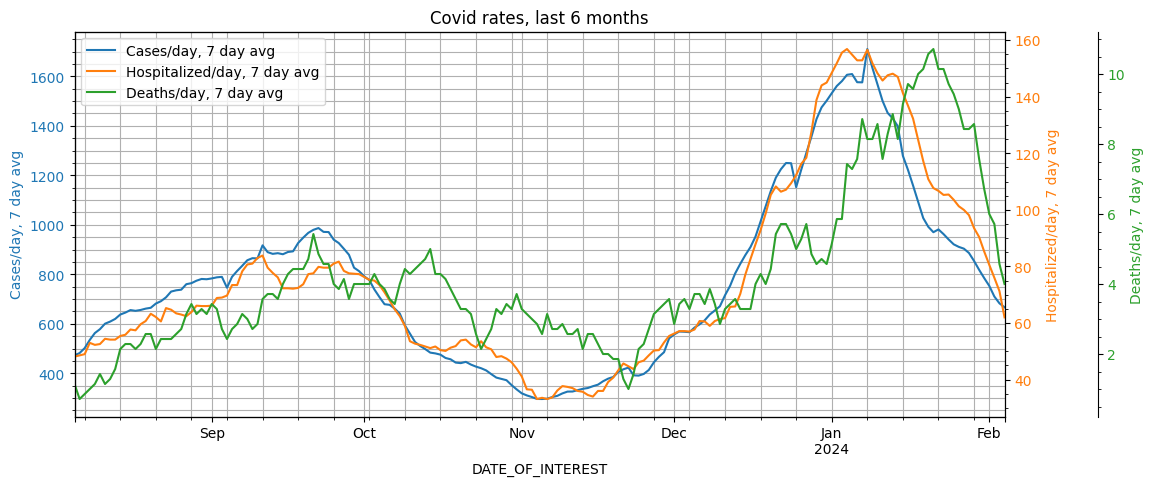

In [6]:
end = dat.index.max()
start = end-pd.tseries.offsets.DateOffset(months=6)
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.title("Covid rates, last 6 months")

Text(0.5, 1.0, 'Covid rates since the start of Omicron')

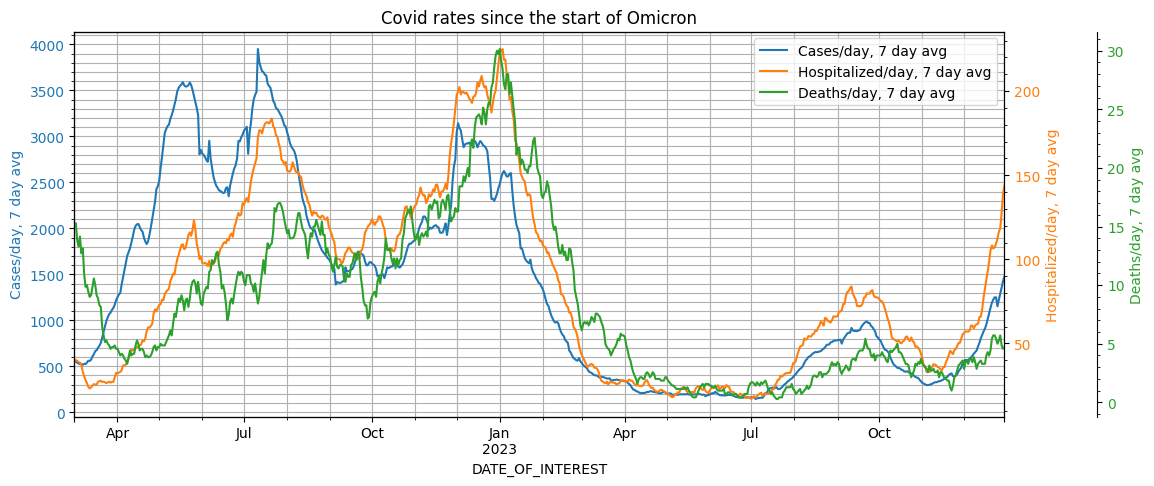

In [7]:
start, end = u.get_wave(5)
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.title("Covid rates since the start of Omicron")

## Data accuracy
We compare aggregates from different dates to estimate the missing data from recent reports

In [8]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [9]:
hdatpart = hdat[(hdat["AS_OF"] >= start) & (hdat["AS_OF"] <= end)]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Cases/day, 7 day avg")
dppart = dp[dp.index >= start]

Text(0.5, 1.0, 'NYC Covid-19 Cases/day, 7 Day Avg, All Reports from 2022-03-01 to 2023-12-31')

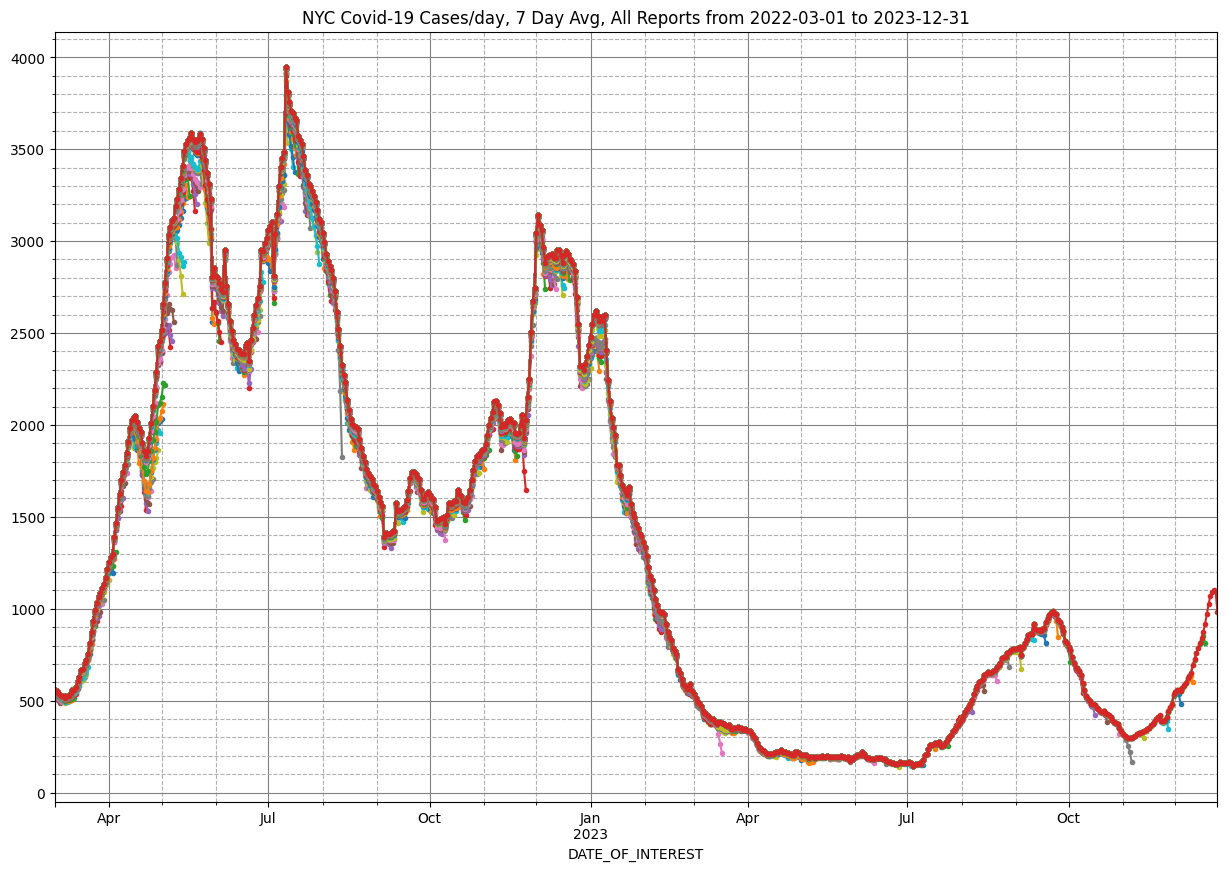

In [10]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Cases/day, 7 Day Avg, All Reports from {start} to {end}")

In [11]:
hdatpart = hdat[(hdat["AS_OF"] >= start) & (hdat["AS_OF"] <= end)]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Hospitalized/day, 7 day avg")
dppart = dp[dp.index >= start]

Text(0.5, 1.0, 'NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports from 2022-03-01 to 2023-12-31')

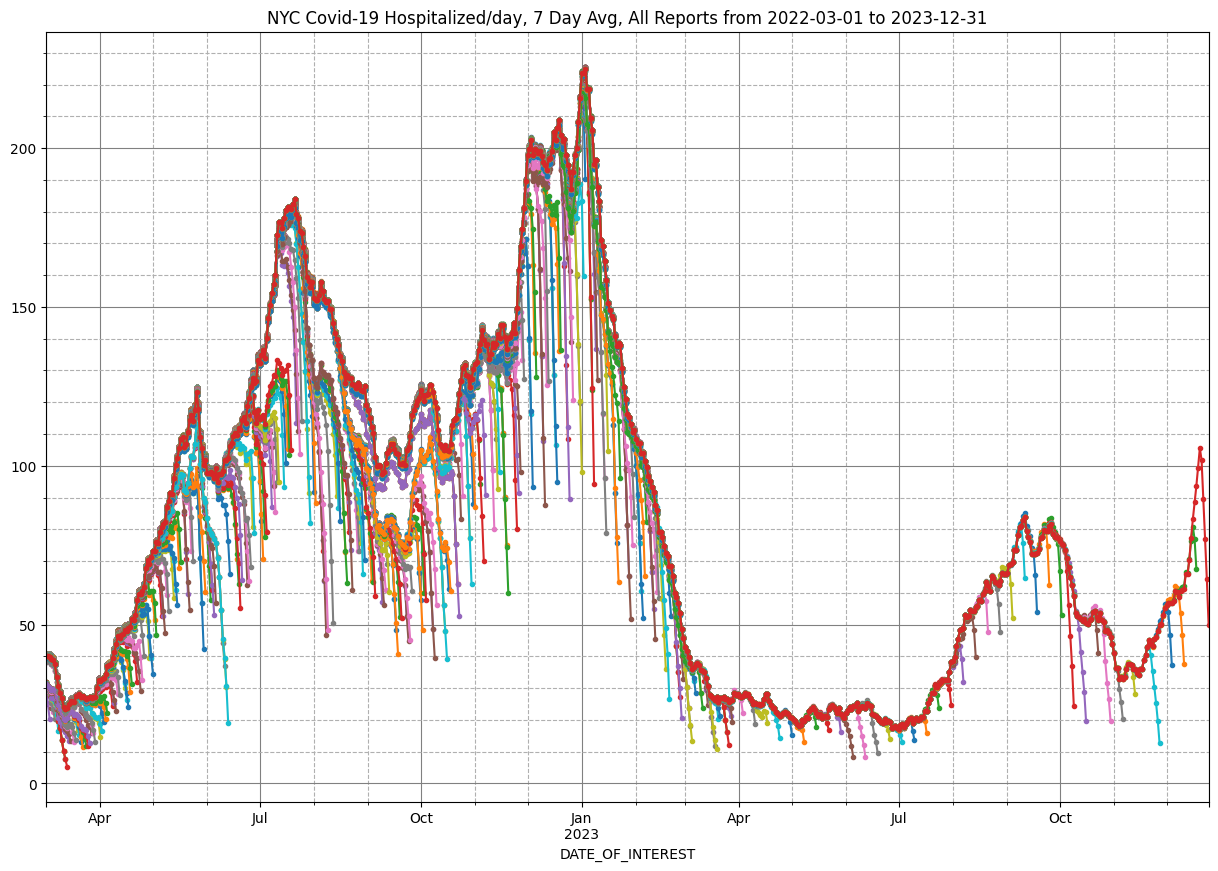

In [12]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports from {start} to {end}")

In [13]:
hdatpart = hdat[(hdat["AS_OF"] >= start) & (hdat["AS_OF"] <= end)]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Deaths/day, 7 day avg")
dppart = dp[dp.index >= start]

Text(0.5, 1.0, 'NYC Covid-19 Deaths/day, 7 Day Avg, All Reports from 2022-03-01 to 2023-12-31')

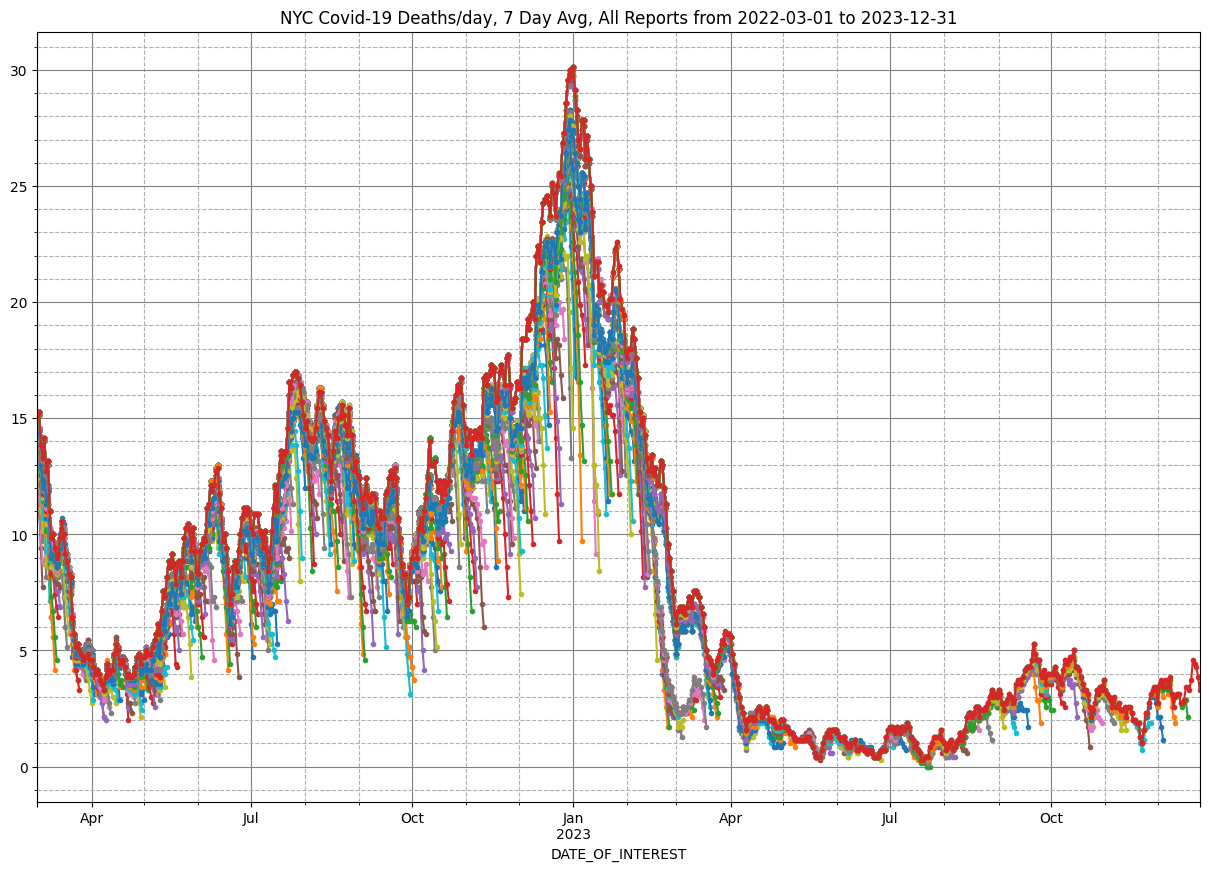

In [14]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Deaths/day, 7 Day Avg, All Reports from {start} to {end}")

Rolling averages for the last 14 days:

In [15]:
period = dat.iloc[-14:]

period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]]

,"Cases/day, 7 day avg","Hospitalized/day, 7 day avg","Deaths/day, 7 day avg"
DATE_OF_INTEREST,,,
2024-01-23,962.428571,105.285714,10.142857
2024-01-24,940.857143,105.428571,9.714286
2024-01-25,921.142857,103.571429,9.428571
2024-01-26,910.857143,101.285714,9.000000
2024-01-27,903.714286,100.000000,8.428571
2024-01-28,886.285714,98.142857,8.428571
2024-01-29,854.142857,93.571429,8.571429
2024-01-30,818.285714,90.428571,7.571429
2024-01-31,784.857143,85.285714,6.714286


# Fourth wave - Omicron
The current wave started in November with the arrival of Omicron.  This wave started before the previous wave completely tapered off.

By December 15th, infections/day surpassed 8,000 (7 day rolling average), surpassing the peaks of the first two waves (5,000/day), but hospitalizations/day and deaths/day were far lower (120/day & 12/day vs 1675/day & 580/day in the first wave, and 400/day & 85/day in the second wave).

Subsequently, the infection rate has taken off.  Checking on January 6th, which included data through January 3rd, January had already surpassed 32,700/day. That's 6.5 times higher than the first two peaks, and all the data for the beginning of January has yet to arrive.  The hospitalization rate has risen to over 760/day, about 45% of the first wave, and surpassing the second wave by about 31%.  The death rate rose to 33/day, which is still far lower than in the first two waves.

So, as of the beginning of January, while the infection rate has risen tremendously, dwarfing the infection rates for the first two waves, the hospitalization and death rates haven't followed suit, indicating that the latest wave is substantially less dangerous than the first two.

<AxesSubplot:xlabel='DATE_OF_INTEREST', ylabel='Cases/day, 7 day avg'>

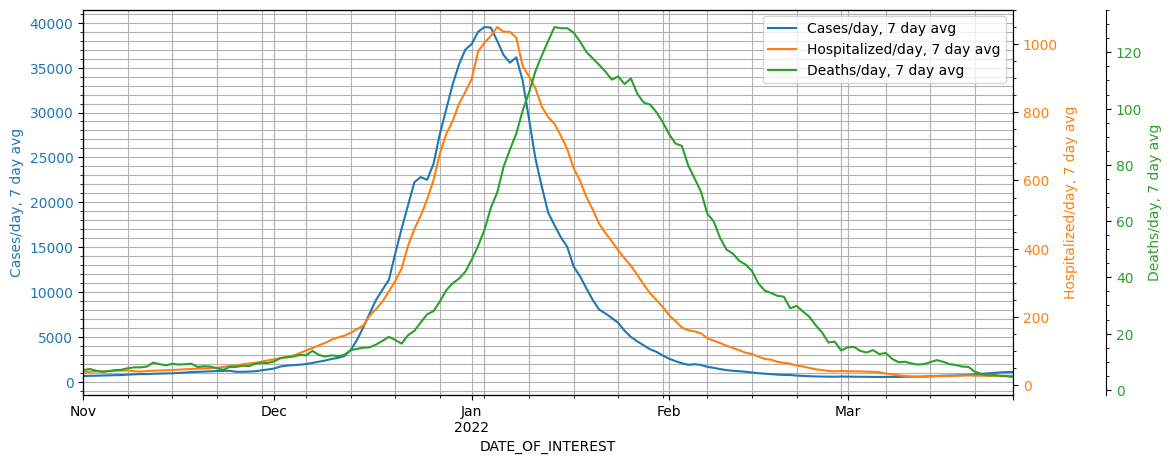

In [16]:
start, end = u.get_wave("four")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

# Other waves (for reference)

## First wave, rise & fall

The first wave looks much as expected.  We see a bell shaped rise & fall in cases/day, hospitalizations/day & deaths/day, with deaths/day lagging by several weeks.  We'd expect hospitalizations to also lag cases, and it does to some extent, but the case data appears to be a little noisy, and it also depends on how exactly cases are counted.

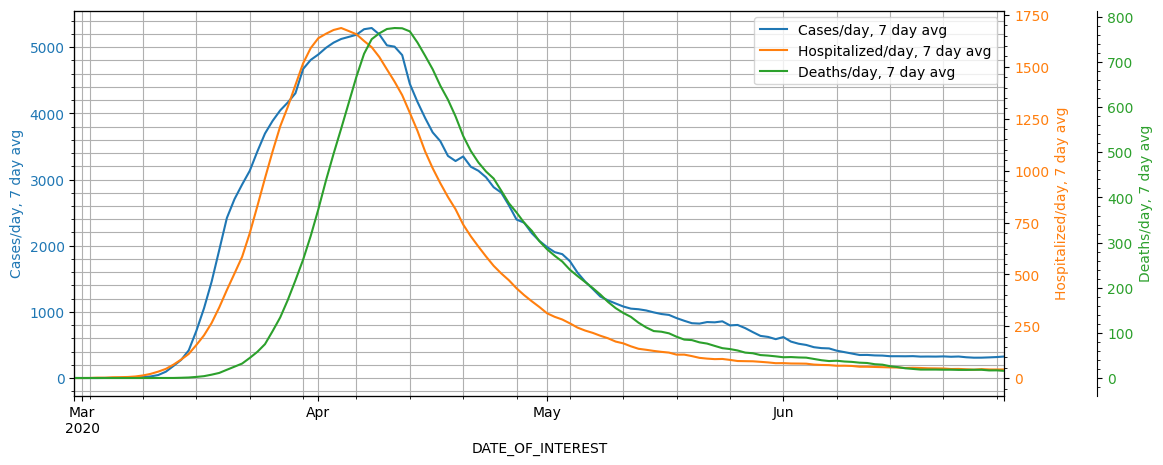

In [17]:
start, end = u.get_wave("one")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))
plt.grid(False, which="minor")

## Second wave
The second wave started in September 2020, peaked around January 2021, and took until June 2021 to fall back down to levels as low as lull after the first peak.

<AxesSubplot:xlabel='DATE_OF_INTEREST', ylabel='Cases/day, 7 day avg'>

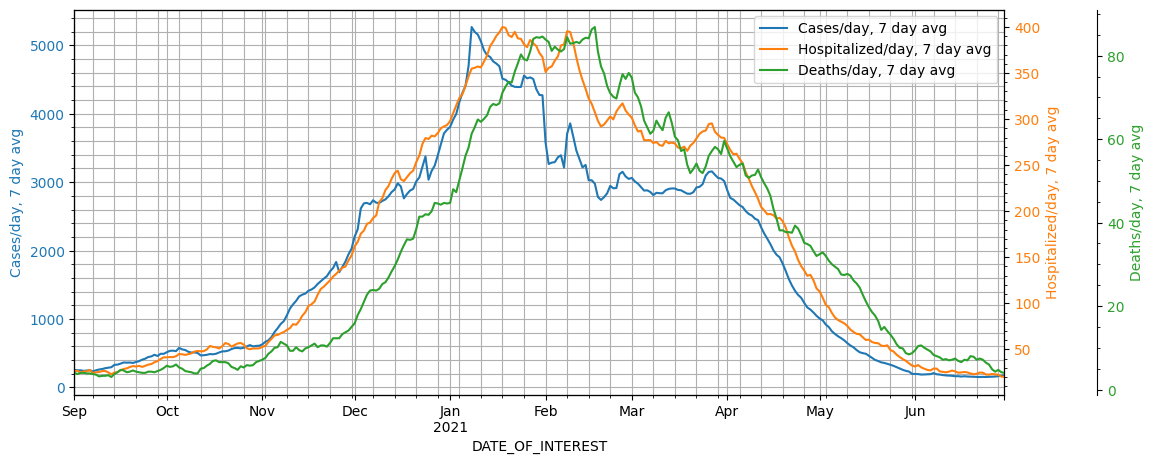

In [18]:
start, end = u.get_wave("two")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

## Third wave - the arrival of Delta

The third wave started in July 2021 with delta showing up.

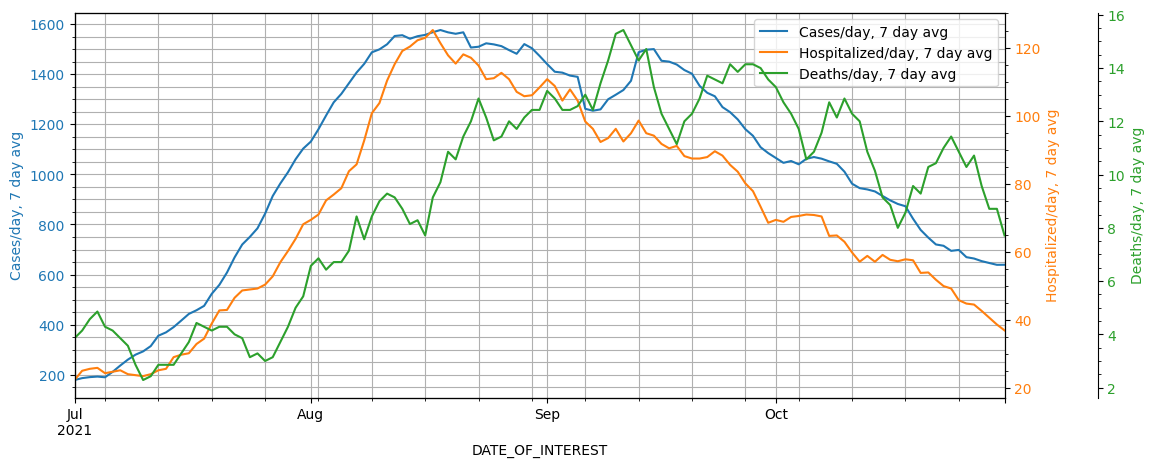

In [19]:
start, end = u.get_wave("three")
period = dat[(dat.index >= start) & (dat.index < end)]

u.plot_multi(period[["Cases/day, 7 day avg",
                     "Hospitalized/day, 7 day avg",
                     "Deaths/day, 7 day avg"]], figsize=(12, 5))

plt.savefig("twoMonthsToOctPeak.png", bbox_inches="tight")

# Accuracy of data, earlier waves
We graph all of the historical reports to analyze the missing data.  On a 7 day rolling average, we look at:
 - Cases/day
 - Hospitalizations/day
 - Deaths/day

When successive reports start all reporting the same number for a given date, that's when the counts for that date have stabilized and become reliable.  Before that, there's too much potential missing data to rely on the counts.

Generally speaking, it takes about 1-2 weeks before a count becomes reliable, although sometimes it takes as long as a month to get all of the data for a given date.

**Note**: We break out the recent history of infections/day because they've been rising so quickly.  Fortunately, such treatment isn't needed for hospitalizations/day and deaths/day.

## Cases/day
Cases per day since the fall-off of the second wave (around 5/9/2021).  Note that NYC started phase 1 of reopening on June 8th.

In [20]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

### Omicron

In [21]:
start, end = u.get_wave("four")

In [22]:
hdatpart = hdat[(hdat["AS_OF"] >= start) & (hdat["AS_OF"] <= end)]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Cases/day, 7 day avg")
dppart = dp[dp.index >= start]

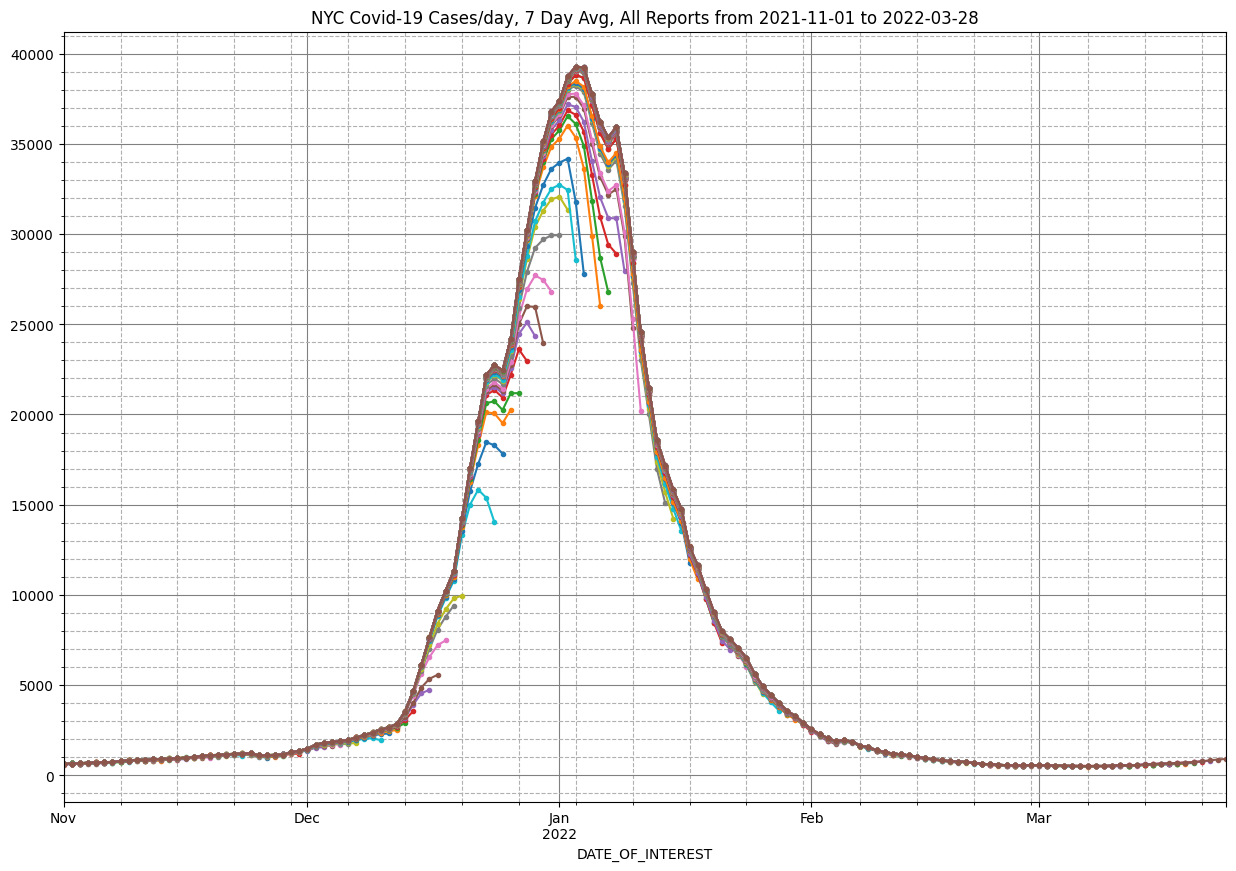

In [23]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Cases/day, 7 Day Avg, All Reports from {start} to {end}")
plt.savefig("casesPerDayHistoryNov2.png", bbox_inches="tight")

### Older analysis

In [24]:
start = "2021-05-16"
end = "2021-11-15"

In [25]:
hdatpart = hdat[(hdat["AS_OF"] >= start) & (hdat["AS_OF"] <= end)]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Cases/day, 7 day avg")
dppart = dp[dp.index >= start]

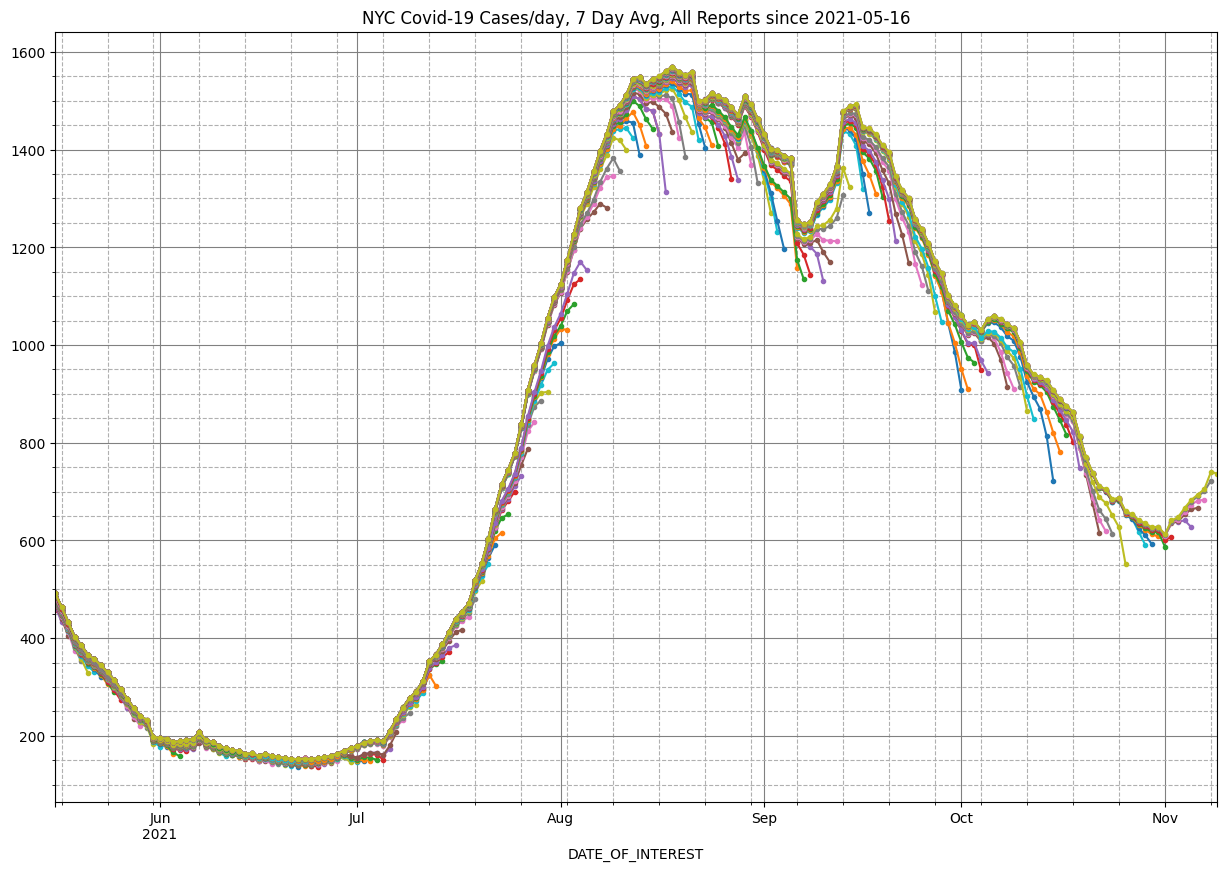

In [26]:
fig, ax = pltdflt((15,10))
dppart.plot(style=".-", ax=ax, legend=None)

plt.title(f"NYC Covid-19 Cases/day, 7 Day Avg, All Reports since {start}")
plt.savefig("casesPerDayHistoryNov2.png", bbox_inches="tight")

## Hospitalizations/day

In [27]:
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Hospitalized/day, 7 day avg")
dppart = dp[dp.index >= start]

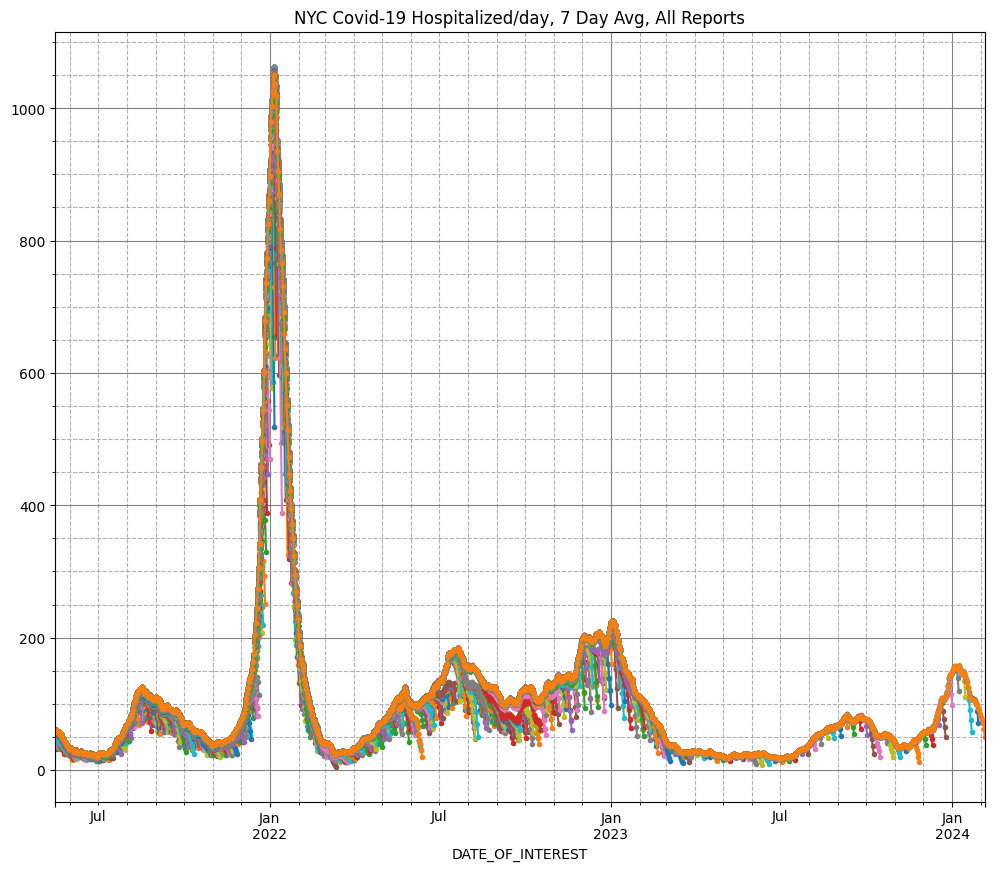

In [28]:
fig, ax = pltdflt()
dppart.plot(style=".-", ax=ax, legend=None)

plt.title("NYC Covid-19 Hospitalized/day, 7 Day Avg, All Reports")
plt.savefig("hospitalizedPerDayRecentHistory.png", bbox_inches="tight")

## Deaths/day

In [29]:
hdatpart = hdat[hdat["AS_OF"] >= start]
dp = hdatpart.pivot_table(index="DATE_OF_INTEREST",
                          columns="AS_OF",
                          values="Deaths/day, 7 day avg")
dppart = dp[dp.index >= start]

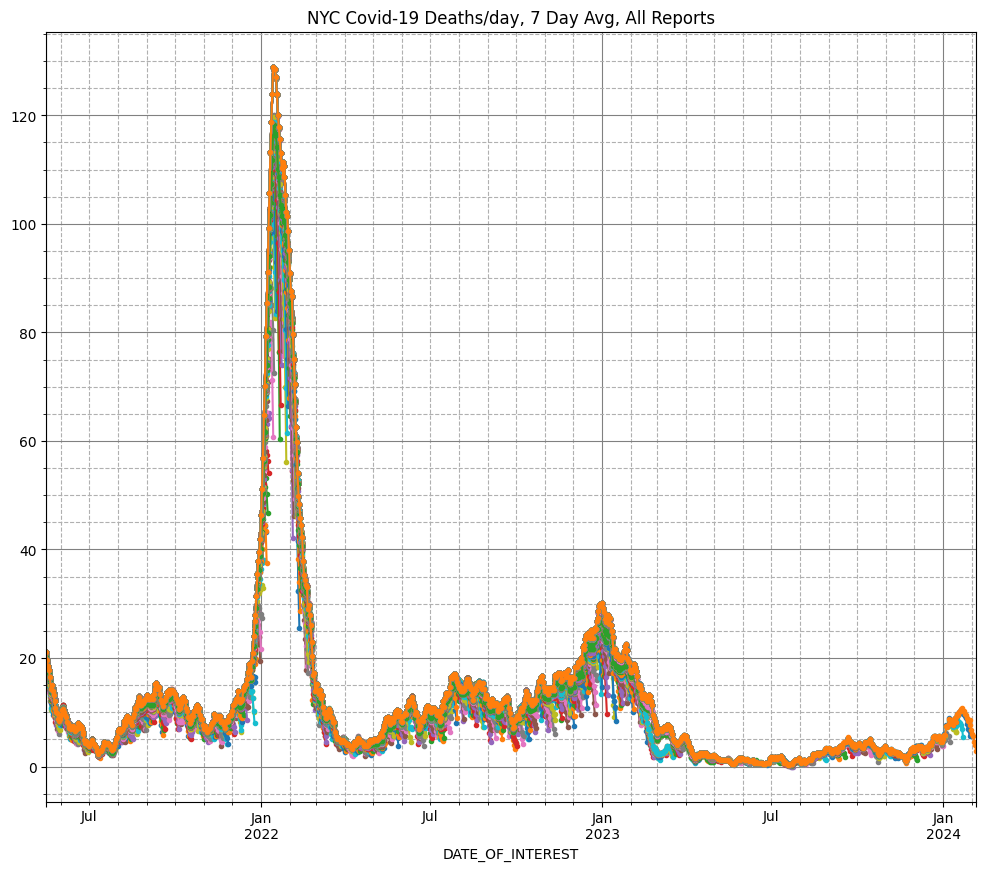

In [30]:
fig, ax = pltdflt()
dppart.plot(style=".-", ax=ax, legend=None)

plt.title("NYC Covid-19 Deaths/day, 7 Day Avg, All Reports")
plt.savefig("deathsPerDayHistory.png", bbox_inches="tight")